# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/leo.png" width=500/></p>



Тем не менее, не время расслабляться! На этот раз, мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- Загрузить данные
- Посмотреть и размер, и примеры данных
- Проверить количество пропусков в данных
    - Убедиться, что пропусков в данных нет и можно строить **baseline**
- Делим данные на train и test 
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже
- Создаем baseline модель, снимаем метрики на тестовой выборке
- Производим анализ данных, готовим план по очистке и предобработке данных
- Создаем функцию очистки
- Производим очистку train и test выборок -> обучаем модель с очищенными данными
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение
- Создаем класс предобработки данных
- Производим предобработку очищенных данных -> обучаем модель
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- По признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю
- Сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые
- Оставить только признаки с высокой корреляцией с целевой переменной
- Посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих
- Посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум
- Комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!

In [153]:
# Зафиксируем состояние случайных чисел
# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.preprocessing import PowerTransformer
TEXT_COLOR = 'black'

plt.rcParams['figure.figsize'] = (15, 10)
plt.rcParams['text.color'] = TEXT_COLOR
plt.rcParams['font.size'] = 14
plt.rcParams['lines.markersize'] = 15
plt.rcParams['axes.labelcolor'] = TEXT_COLOR
plt.rcParams['xtick.color'] = TEXT_COLOR
plt.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [154]:
df_src = pd.read_csv('boston.csv')
df_src.shape

(506, 14)

In [155]:
df_src.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [156]:
df_src.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

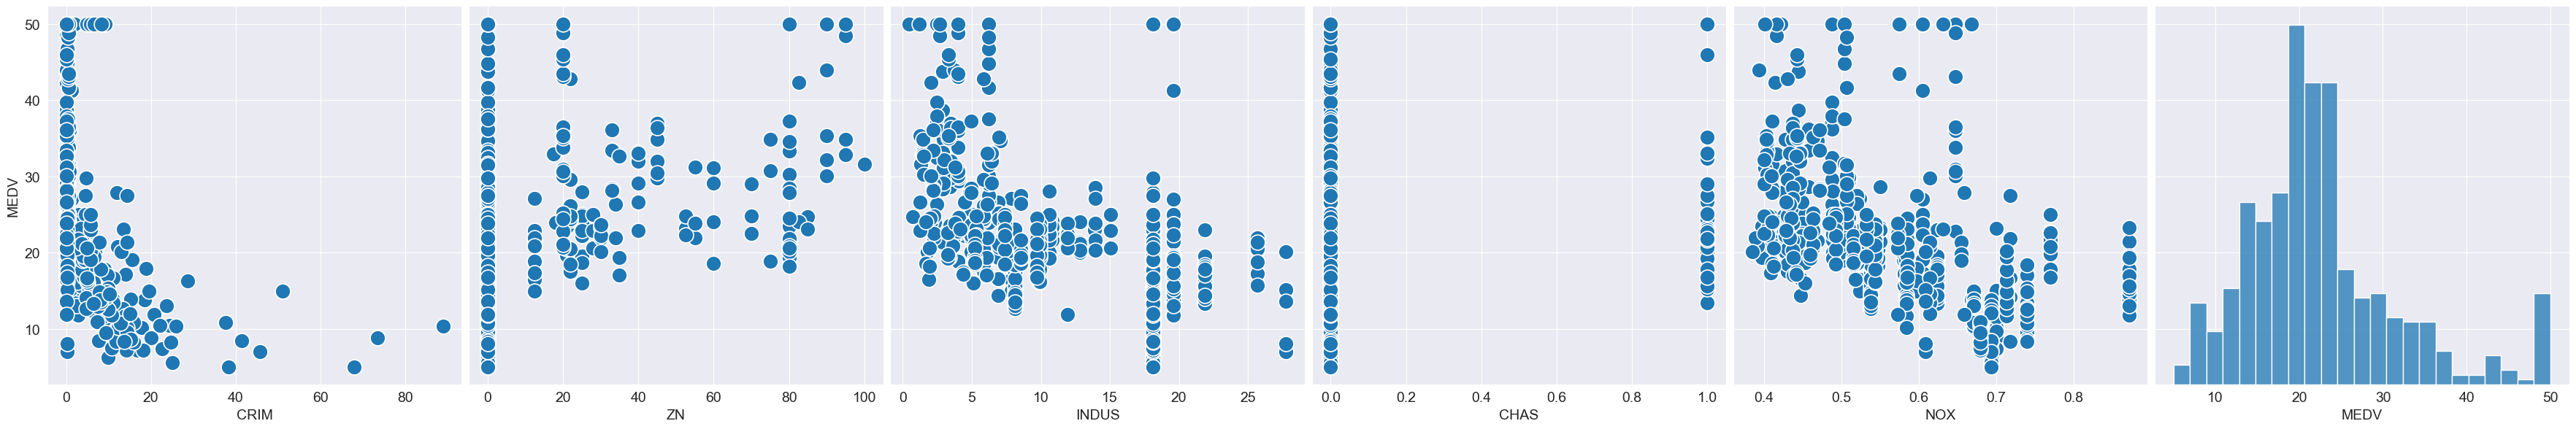

In [157]:
features1 = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'MEDV']
sns.pairplot(df_src[features1], diag_kind='auto', height=6, y_vars = features1[5])
plt.show()

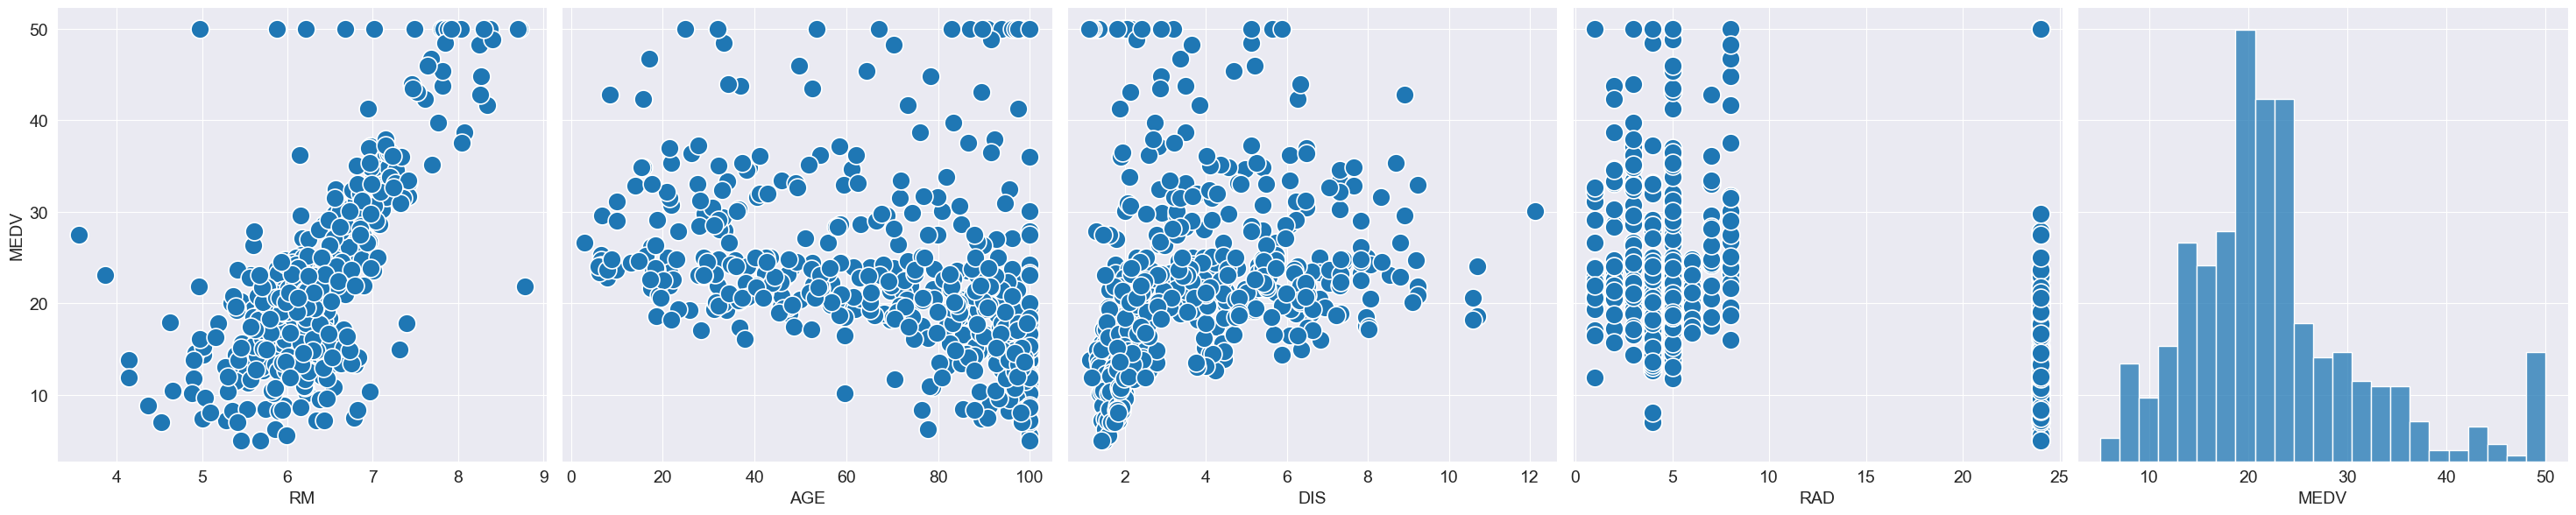

In [158]:
features2 = ['RM', 'AGE', 'DIS', 'RAD', 'MEDV']
sns.pairplot(df_src[features2], diag_kind='auto', height=6, y_vars = features2[4])
plt.show()

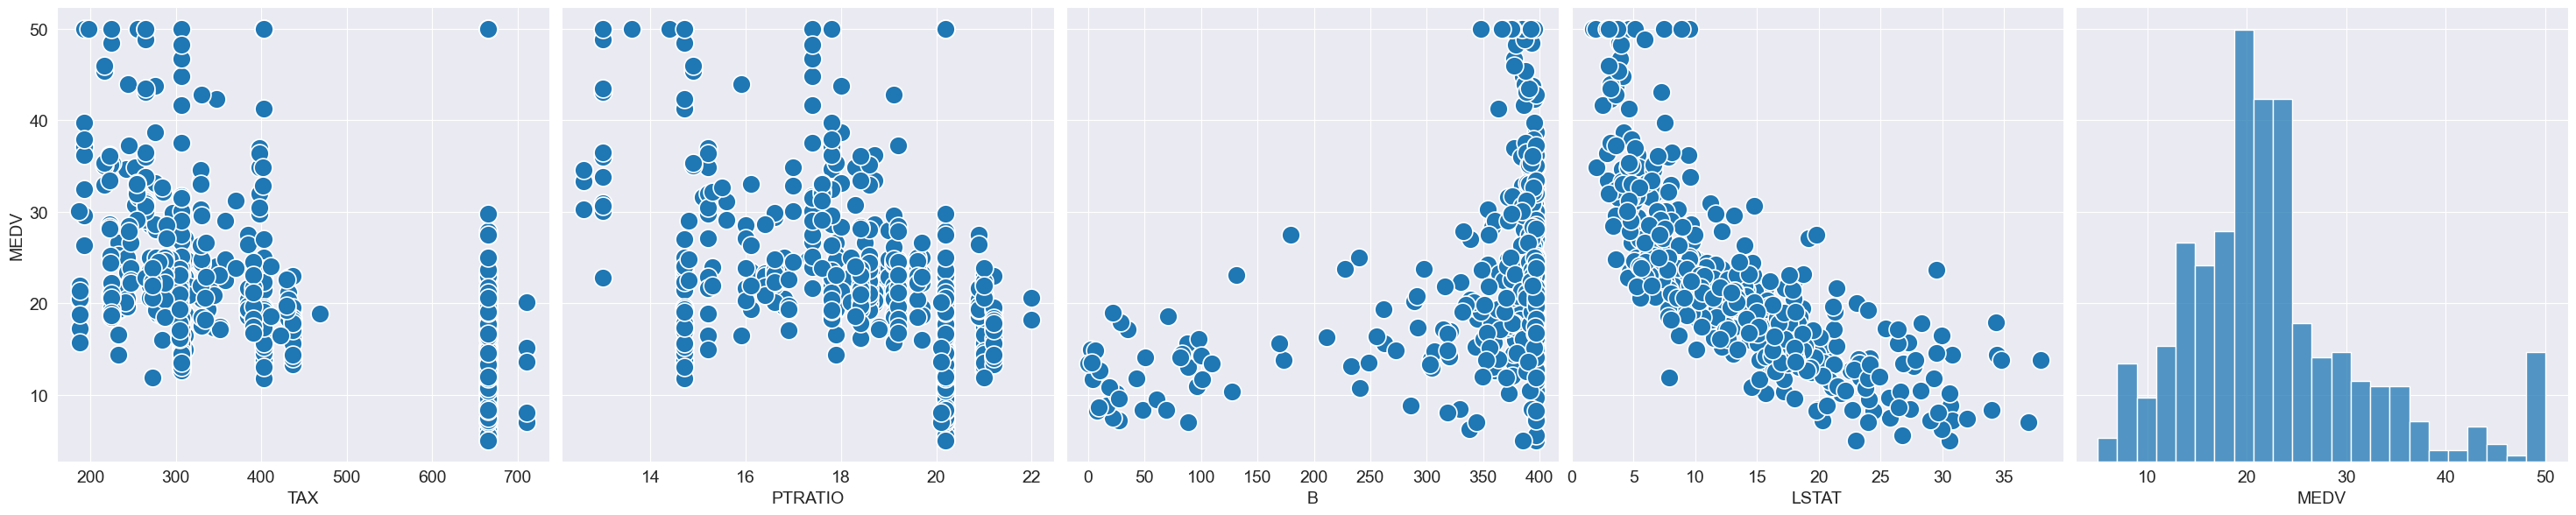

In [159]:
features3 = ['TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
sns.pairplot(df_src[features3], diag_kind='auto', height=6, y_vars = features3[4])
plt.show()

In [160]:
#Построение baseline
from sklearn.model_selection import train_test_split
df_train_data, df_test_data = train_test_split(df_src, test_size=.3, random_state=RANDOM_SEED, shuffle=True) #деление данных на тренировку и на тест

df_train_data.shape, df_test_data.shape #вывод их размера

((354, 14), (152, 14))

In [161]:
from sklearn.linear_model import LinearRegression

def preprocess_data_poly(df, max_power):
    kolonki = df.columns.values
    Kolichestvo_Kolonok = kolonki.size
    
    for name in range(Kolichestvo_Kolonok):
        df[f'{kolonki[name]}_poly_{max_power}'] = df[kolonki[name]]**max_power   # создаю столбец и добавляю в него данные возведенные во 2 степень
    return df

reg_model = LinearRegression()          #создаю объект
slojnost_modeli = 2

#Тренировка
df_x = df_train_data.copy()             #копирую
y_true = df_x.pop('MEDV')               #записываю в переменную y без заголовка
df_x = preprocess_data_poly(df_x, slojnost_modeli)    #возвожу в степень


reg_model.fit(df_x, y_true)         #обучаю
y_pred = reg_model.predict(df_x)    #предсказываю


#Тестовая
df_test_x = df_test_data.copy()
y_test_true = df_test_x.pop('MEDV')
df_test_x = preprocess_data_poly(df_test_x, slojnost_modeli)

y_test_pred = reg_model.predict(df_test_x)


In [162]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def vivod_metric(train_true, train_pred, test_true, test_pred):
    #MAE
    print('\nMAE')
    MAE_value_train = mean_absolute_error(train_true, train_pred)
    MAE_value_test = mean_absolute_error(test_true, test_pred)

    print(f'Test vs train: {MAE_value_test} | {MAE_value_train}')
    print(f'Error ratio: {MAE_value_test/MAE_value_train}')

    #R2
    print('\nR2')
    R2_value_train = r2_score(train_true, train_pred)
    R2_value_test = r2_score(test_true, test_pred)
    print(f'Test vs train: {R2_value_test} | {R2_value_train}')
    print(f'Error ratio: {R2_value_test/R2_value_train}')

    #RMSE
    print('\nRMSE')
    RMSE_value_train = np.sqrt(mean_squared_error(train_true, train_pred))
    RMSE_value_test = np.sqrt(mean_squared_error(test_true, test_pred))
    print(f'Test vs train: {RMSE_value_test} | {RMSE_value_train}')
    print(f'Error ratio: {RMSE_value_test/RMSE_value_train}')


print('Метрики без очистки данных и предобработки')
vivod_metric(y_true, y_pred, y_test_true, y_test_pred)

Метрики без очистки данных и предобработки

MAE
Test vs train: 2.550744510253511 | 2.707304288993712
Error ratio: 0.9421713401863693

R2
Test vs train: 0.823263993040799 | 0.8278980845077447
Error ratio: 0.9944025822094985

RMSE
Test vs train: 3.628931933342668 | 3.8893651252112087
Error ratio: 0.9330396649621838


In [163]:
#В полученных метриках ничего подозрительного не замечено, средняя абсолютная ошибка составила около 5% от максимального значения цены, в тоже время 
#отношение MAE тренировки к MAE теста имеет не высокое значние, то есть переобучения модели тоже вроде не случилось
#R2 выше 0,8, что говорит о том, что модель получилась неплохая
#RMSE, судя по тому, что оно больше MAE в данных имеются выбросы и среднее значение ошибки между истинным значением и предсказаным больше 1

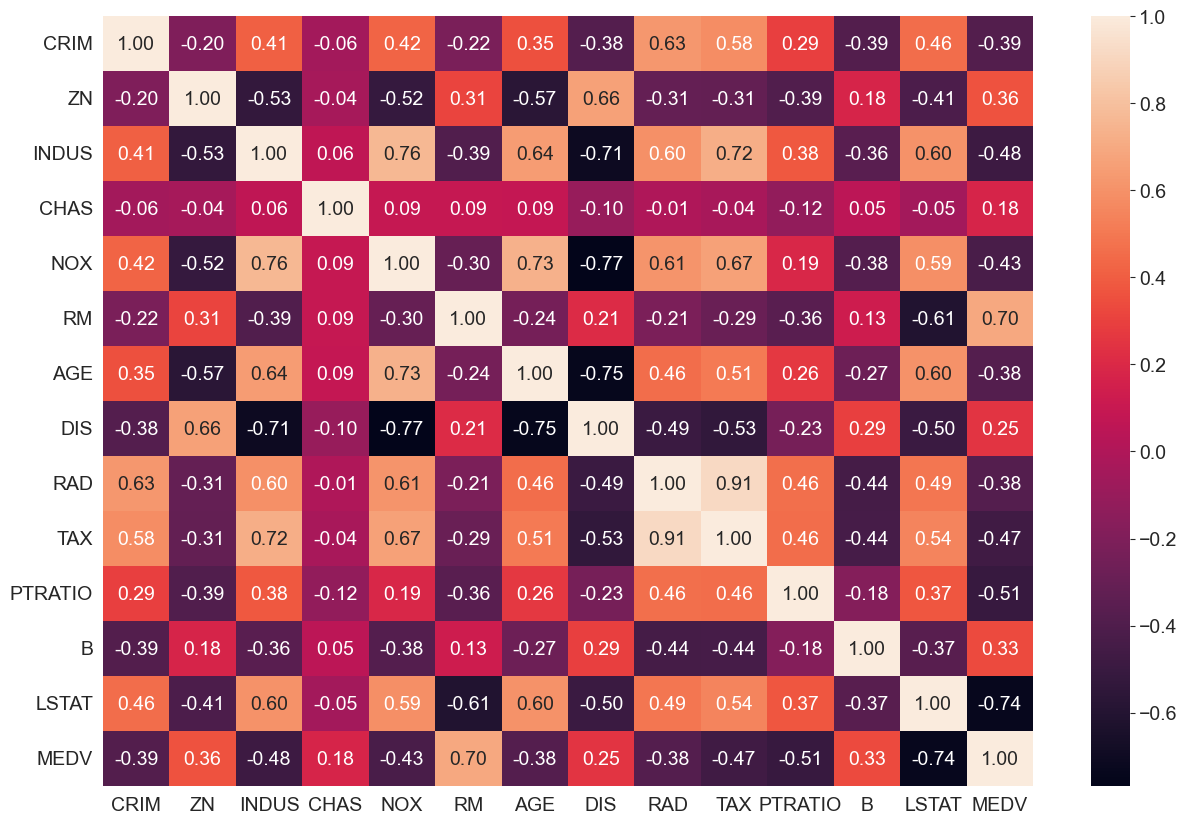

In [164]:
correlation_mtrx = df_src.corr()          #считаю корреляцию
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')
plt.show()
#Из данной таблицы видно, что из анализа можно исключить такие признаки как ZN, CHAS, DIS, B, так как у них низкая корреляция с величиной MEDV

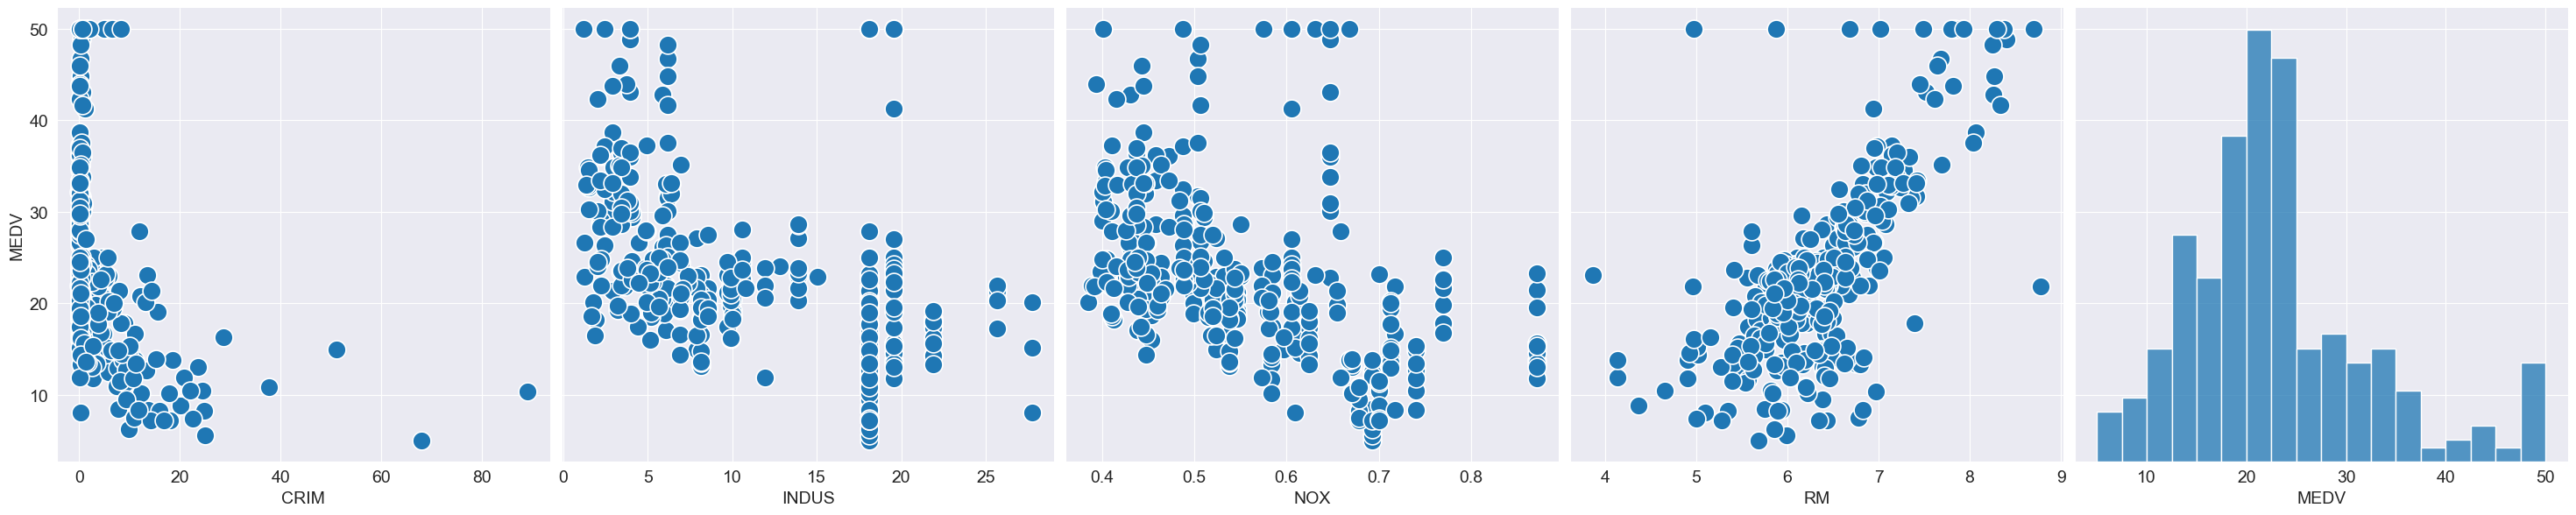

In [165]:
new_df_train_data = df_train_data.drop(['ZN', 'CHAS', 'DIS', 'B'], axis=1)    # удалил слабокоррелирующие признаки
features6 = ['CRIM', 'INDUS', 'NOX', 'RM', 'MEDV']                            # просто вспомогательный массив 1
features7 = ['RAD', 'TAX', 'PTRATIO', 'LSTAT', 'AGE', 'MEDV']                 # просто вспомогательный массив 2
sns.pairplot(data=new_df_train_data[features6],  y_vars = ['MEDV'], diag_kind='auto', height=6)
plt.show()


In [166]:
# Признак CRIM имеет несколько точек выбросов - при crim > 46 и medv > 6 - эти три точки будут удалены
# Признак INDUS имеет выбросы в районе indus > 15,  medv > 40
# Признак NOX имеет выбросы в районе 0.4 < nox < 0.9  и medv > 40,    и при nox > 0.8 и medv > 15
# Признак RM имеет выбросы в районе 3 < rm < 4  и medv > 10,          и при 7 < rm < 9  и medv < 22      и при 4 < rm < 7.5  и medv < 45

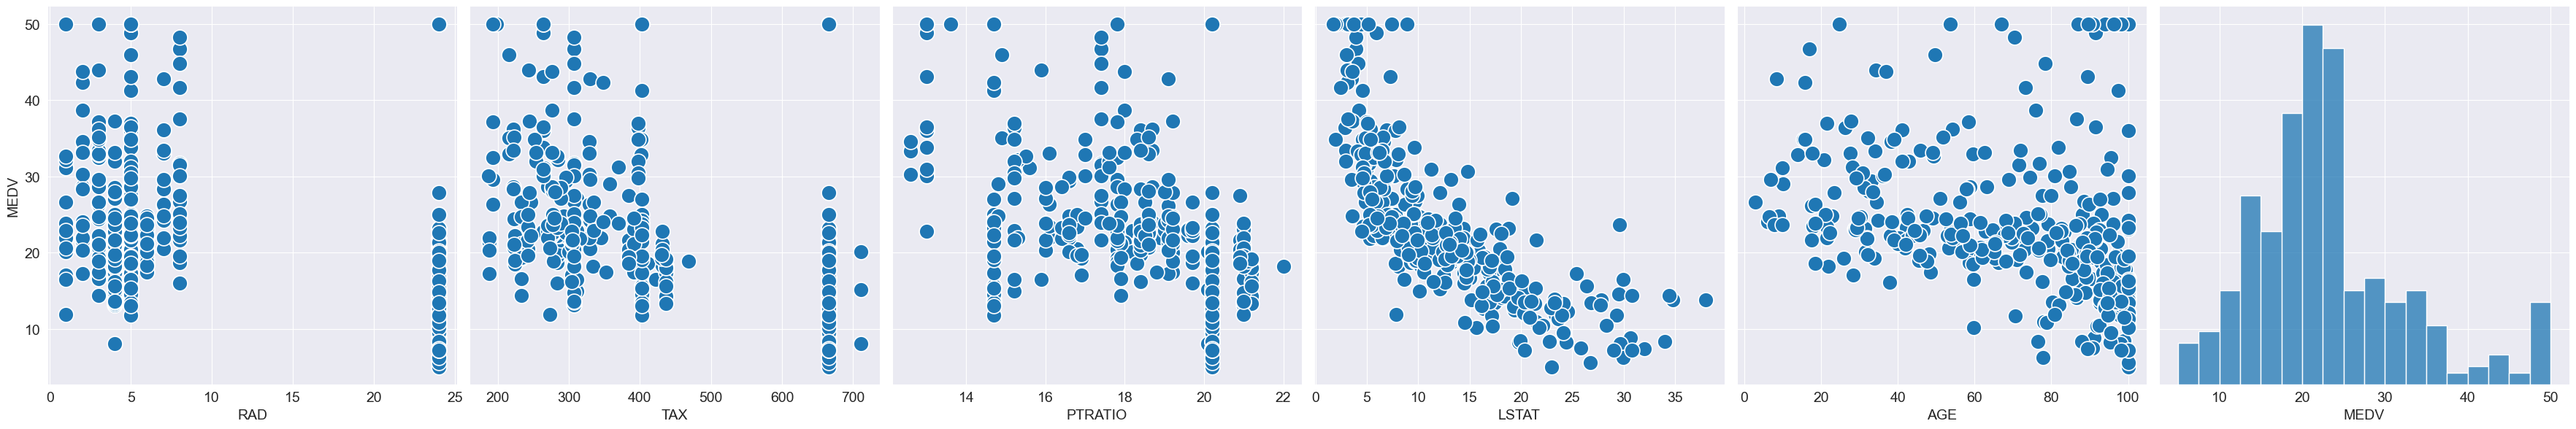

In [167]:
sns.pairplot(data=new_df_train_data[features7],  y_vars = ['MEDV'], diag_kind='auto', height=6)
plt.show()

In [168]:
# Признак RAD имеет выбросы в районе 20 < rad < 25  и medv > 35       и при 0 < rad < 5  и medv < 10
# Признак TAX имеет выбросы в районе 350 < tax < 700,  medv > 45
# Признак PTRATIO явных выбросов не имеет
# Признак LSTAT явных выбросов не имеет
# Признак AGE имеет странные точки 80 < age < 100 и medv > 45
outliers_1 = new_df_train_data[(80 < new_df_train_data['AGE']) & (100 > new_df_train_data['AGE']) & (new_df_train_data['MEDV'] > 45)]
outliers_1

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,MEDV
262,0.52014,3.97,0.647,8.398,91.5,5,264.0,13.0,5.91,48.8
369,5.66998,18.10,0.631,6.683,96.8,24,666.0,20.2,3.73,50.0
163,1.51902,19.58,0.605,8.375,93.9,5,403.0,14.7,3.32,50.0
370,6.53876,18.10,0.631,7.016,97.5,24,666.0,20.2,2.96,50.0
162,1.83377,19.58,0.605,7.802,98.2,5,403.0,14.7,1.92,50.0
161,1.46336,19.58,0.605,7.489,90.8,5,403.0,14.7,1.73,50.0
166,2.01019,19.58,0.605,7.929,96.2,5,403.0,14.7,3.70,50.0
257,0.61154,3.97,0.647,8.704,86.9,5,264.0,13.0,5.12,50.0
372,8.26725,18.10,0.668,5.875,89.6,24,666.0,20.2,8.88,50.0


In [169]:
# Подозрительные точки имеют такую цену, потому что по признаку RM эти "подозрительные" квартиры имеют от 6.5 до 8.5 комнат. Поэтому вряд ли эти точки выбросы 

In [170]:
# Реализую функцию чистки признаков
def clean_dataset(dannie):
    outliers_mask_CRIM = (46 < dannie['CRIM']) & (dannie['MEDV'] > 6)

    outliers_mask_INDUS = (15 < dannie['INDUS']) & (dannie['MEDV'] > 40)

    outliers_mask_NOX = (0.4 < dannie['NOX']) & (0.9 > dannie['NOX']) & (dannie['MEDV'] > 40)
    outliers_mask_NOX1 = (0.8 < dannie['NOX']) & (dannie['MEDV'] > 15)

    outliers_mask_RM = (3 < dannie['RM']) & (4 > dannie['RM']) & (dannie['MEDV'] > 10)
    outliers_mask_RM1 = (7 < dannie['RM']) & (9 > dannie['RM']) & (dannie['MEDV'] < 22)
    outliers_mask_RM2 = (4 < dannie['RM']) & (7.5 > dannie['RM']) & (dannie['MEDV'] > 45)

    outliers_mask_RAD = (20 < dannie['RAD']) & (25 > dannie['RAD']) & (dannie['MEDV'] > 35)
    outliers_mask_RAD1 = (0 < dannie['RAD']) & (5 > dannie['RAD']) & (dannie['MEDV'] < 10)

    outliers_mask_TAX = (350 < dannie['TAX']) & (700 > dannie['TAX']) & (dannie['MEDV'] > 45)

    

    outliers_mask_all = outliers_mask_CRIM | outliers_mask_INDUS | outliers_mask_NOX | outliers_mask_NOX1 | outliers_mask_RM | outliers_mask_RM1 |  outliers_mask_RM2 | outliers_mask_RAD | outliers_mask_RAD1 | outliers_mask_TAX

    dannie_cleaned = dannie.loc[~outliers_mask_all]
    return dannie_cleaned

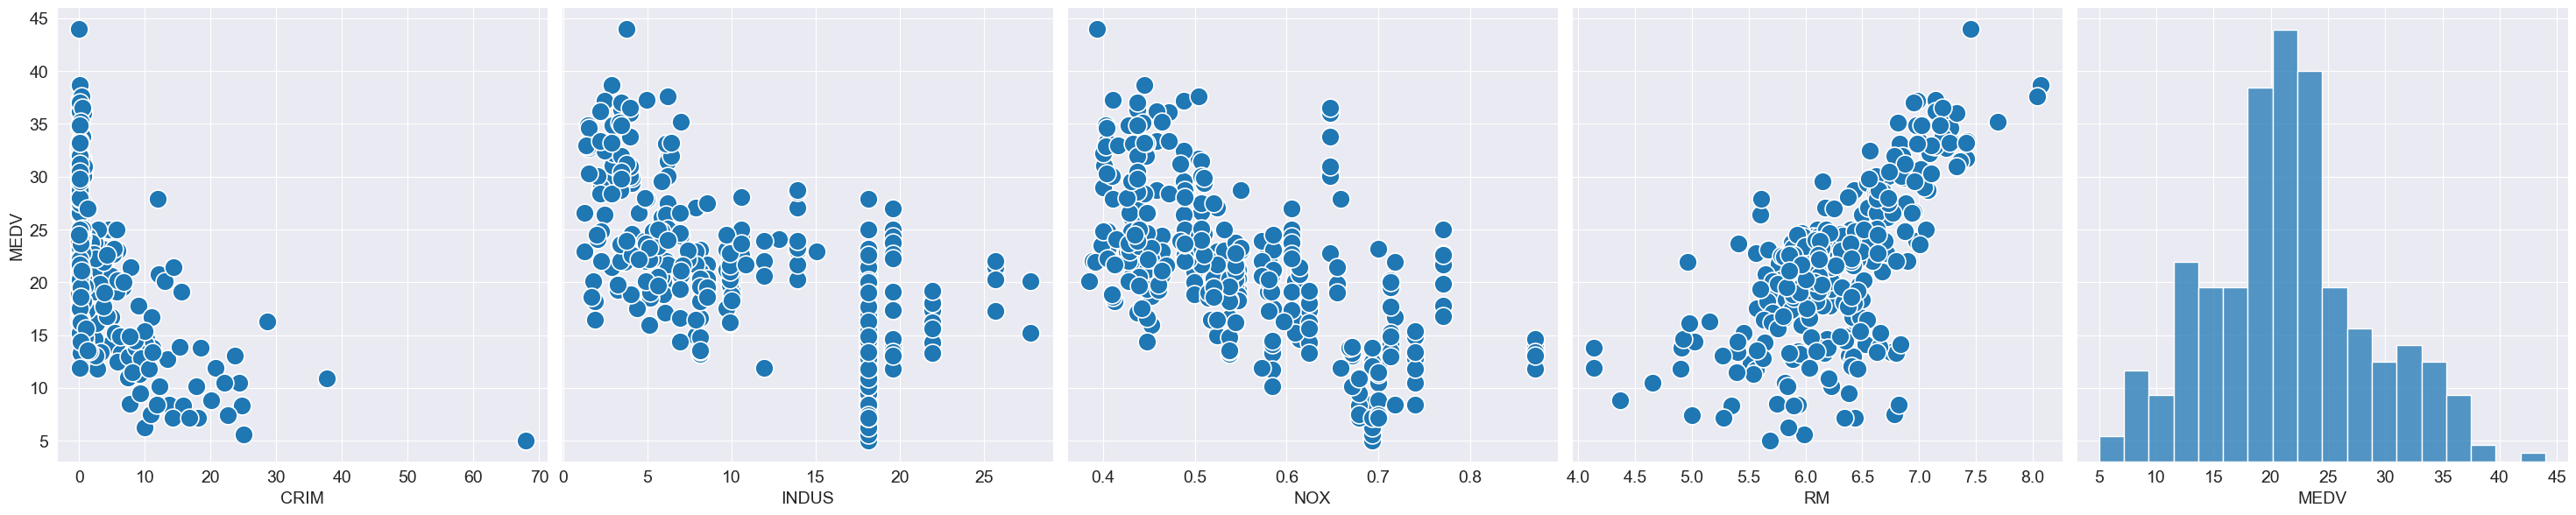

In [171]:
clean_new_df_train_data = clean_dataset(new_df_train_data) # чистка
sns.pairplot(data=clean_new_df_train_data[features6],  y_vars = ['MEDV'], diag_kind='auto', height=6) #проверка того, что убрал нужные точки
plt.show()


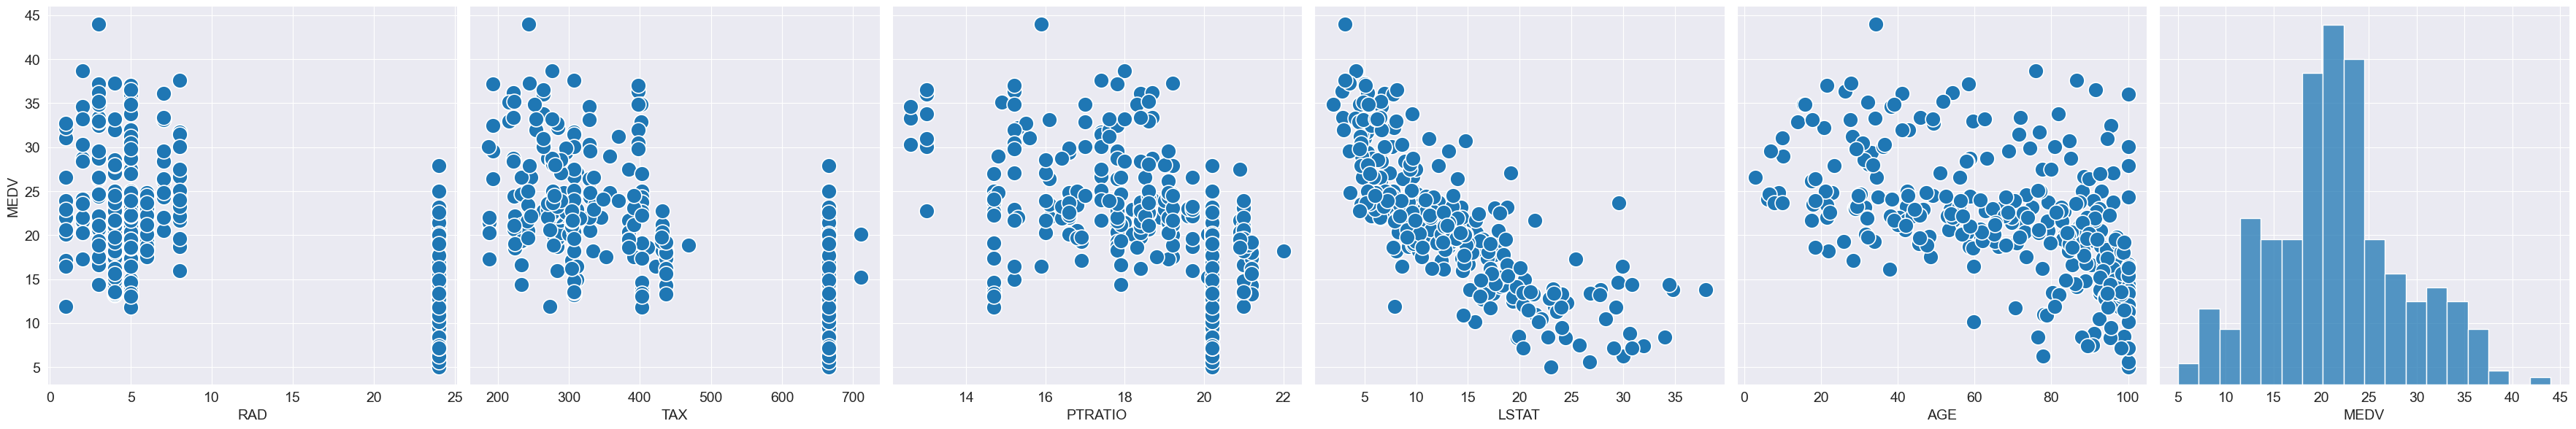

In [172]:
sns.pairplot(data=clean_new_df_train_data[features7],  y_vars = ['MEDV'], diag_kind='auto', height=6) #проверка, что убрал нужные точки
plt.show()


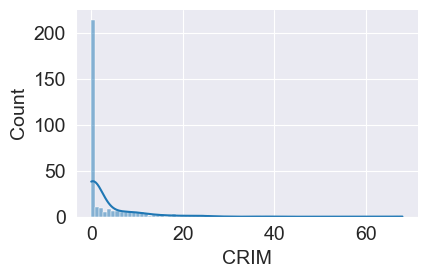

In [173]:
# Странных точек стало поменьше
# Теперь начинаю править распределение
sns.displot(clean_new_df_train_data['CRIM'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\3860418416.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['CRIM_log'] = np.log(clean_new_df_train_data['CRIM'])


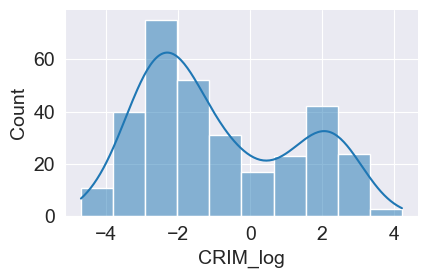

In [174]:
#Вижу не Гауссовское распределение - правлю:
#pt = PowerTransformer(method='box-cox', copy = False)
#pt.fit(clean_new_df_train_data['CRIM'].values.reshape(-1,1))
#pt.transform(clean_new_df_train_data['CRIM'].values.reshape(-1,1))

clean_new_df_train_data['CRIM_log'] = np.log(clean_new_df_train_data['CRIM'])

sns.displot(clean_new_df_train_data['CRIM_log'], kde=True, height=3, aspect=1.5)
plt.show()

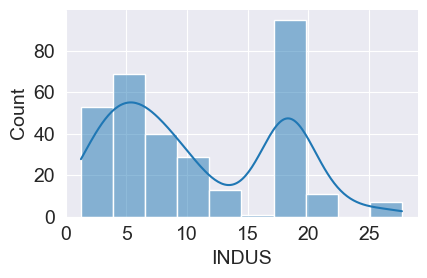

In [175]:
sns.displot(clean_new_df_train_data['INDUS'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\1669900380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['INDUS_log'] = np.log(clean_new_df_train_data['INDUS'])


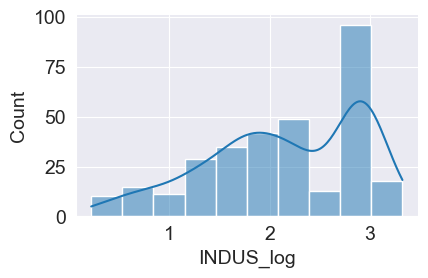

In [176]:
#pt.fit(clean_new_df_train_data['INDUS'].values.reshape(-1,1))
#pt.transform(clean_new_df_train_data['INDUS'].values.reshape(-1,1))

clean_new_df_train_data['INDUS_log'] = np.log(clean_new_df_train_data['INDUS'])
sns.displot(clean_new_df_train_data['INDUS_log'], kde=True, height=3, aspect=1.5)
plt.show()

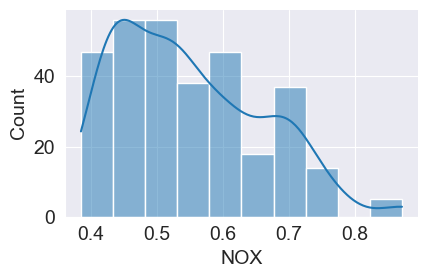

In [177]:
sns.displot(clean_new_df_train_data['NOX'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\3989767378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['NOX_log'] = np.log(clean_new_df_train_data['NOX'])


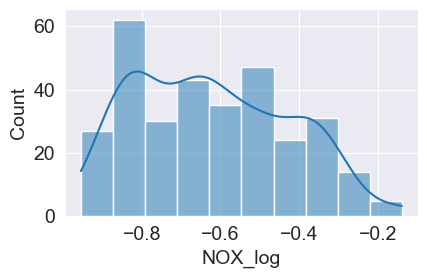

In [178]:
#pt.fit(clean_new_df_train_data['NOX'].values.reshape(-1,1))
#pt.transform(clean_new_df_train_data['NOX'].values.reshape(-1,1))

clean_new_df_train_data['NOX_log'] = np.log(clean_new_df_train_data['NOX'])
sns.displot(clean_new_df_train_data['NOX_log'], kde=True, height=3, aspect=1.5)
plt.show()

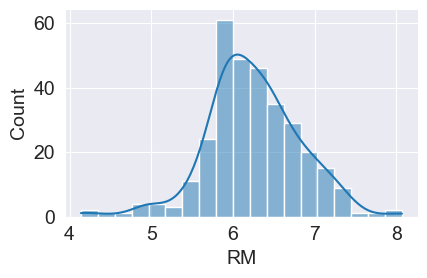

In [179]:
sns.displot(clean_new_df_train_data['RM'], kde=True, height=3, aspect=1.5)
plt.show()

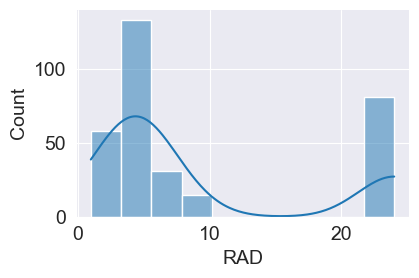

In [180]:
sns.displot(clean_new_df_train_data['RAD'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\1357234208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['RAD_log'] = np.log(clean_new_df_train_data['RAD'])


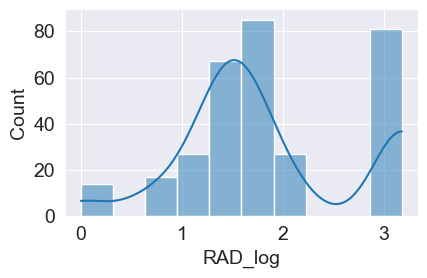

In [181]:
# С RAD PowerTransform почему-то не сработал:(

clean_new_df_train_data['RAD_log'] = np.log(clean_new_df_train_data['RAD'])
sns.displot(clean_new_df_train_data['RAD_log'], kde=True, height=3, aspect=1.5)
plt.show()

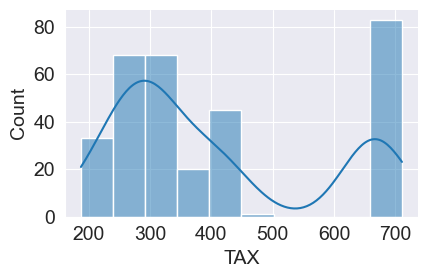

In [182]:
sns.displot(clean_new_df_train_data['TAX'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\225235140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['TAX_log'] = np.log(clean_new_df_train_data['TAX'])


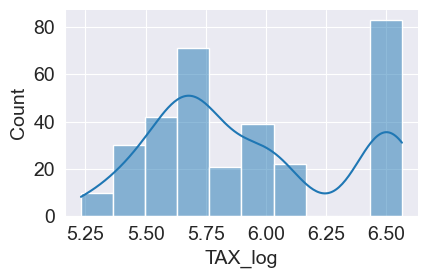

In [183]:
#pt.fit(clean_new_df_train_data['TAX'].values.reshape(-1,1))
#pt.transform(clean_new_df_train_data['TAX'].values.reshape(-1,1))

clean_new_df_train_data['TAX_log'] = np.log(clean_new_df_train_data['TAX'])
sns.displot(clean_new_df_train_data['TAX_log'], kde=True, height=3, aspect=1.5)
plt.show()

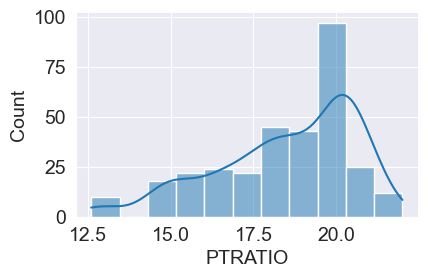

In [184]:
sns.displot(clean_new_df_train_data['PTRATIO'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\235475998.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['PTRATIO_log'] = np.log(clean_new_df_train_data['PTRATIO'])


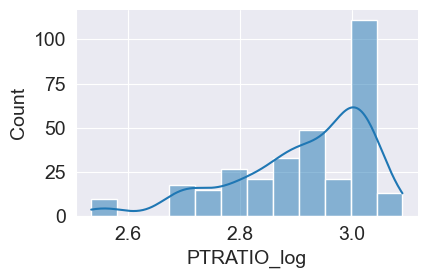

In [185]:
#pt.fit(clean_new_df_train_data['PTRATIO'].values.reshape(-1,1))
#pt.transform(clean_new_df_train_data['PTRATIO'].values.reshape(-1,1))

clean_new_df_train_data['PTRATIO_log'] = np.log(clean_new_df_train_data['PTRATIO'])
sns.displot(clean_new_df_train_data['PTRATIO_log'], kde=True, height=3, aspect=1.5)
plt.show()

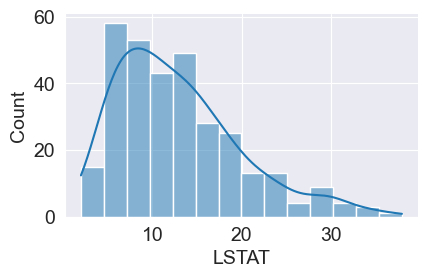

In [186]:
sns.displot(clean_new_df_train_data['LSTAT'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\3402013147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['LSTAT_log'] = np.log(clean_new_df_train_data['LSTAT'])


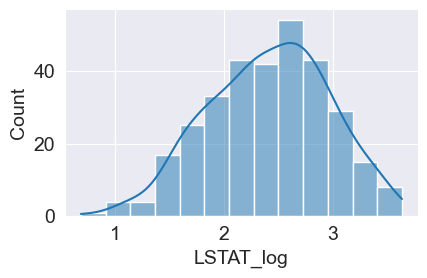

In [187]:
#pt.fit(clean_new_df_train_data['LSTAT'].values.reshape(-1,1))
#pt.transform(clean_new_df_train_data['LSTAT'].values.reshape(-1,1))

clean_new_df_train_data['LSTAT_log'] = np.log(clean_new_df_train_data['LSTAT'])
sns.displot(clean_new_df_train_data['LSTAT_log'], kde=True, height=3, aspect=1.5)
plt.show()

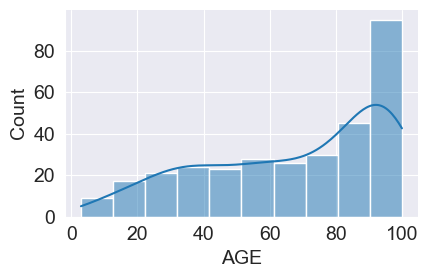

In [188]:
sns.displot(clean_new_df_train_data['AGE'], kde=True, height=3, aspect=1.5)
plt.show()

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\1157983368.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_train_data['AGE_log'] = np.log(clean_new_df_train_data['AGE'])


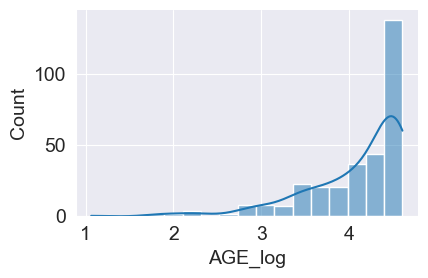

In [189]:
#pt.fit(clean_new_df_train_data['AGE'].values.reshape(-1,1))
#pt.transform(clean_new_df_train_data['AGE'].values.reshape(-1,1))

clean_new_df_train_data['AGE_log'] = np.log(clean_new_df_train_data['AGE'])
sns.displot(clean_new_df_train_data['AGE_log'], kde=True, height=3, aspect=1.5)
plt.show()

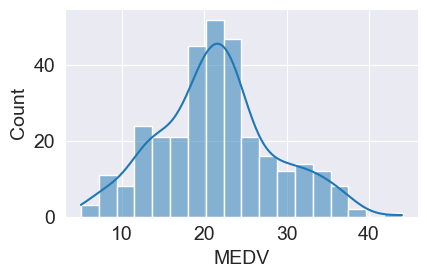

In [190]:
sns.displot(clean_new_df_train_data['MEDV'], kde=True, height=3, aspect=1.5)
plt.show()

In [191]:
#удаляем ненужные столбцы
DEL_clean_new_df_train_data = clean_new_df_train_data.drop(['CRIM', 'INDUS', 'NOX', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'AGE'], axis=1)
DEL_clean_new_df_train_data.head(2)  # проверяю, что остались только нужные столбцы

,RM,MEDV,CRIM_log,INDUS_log,NOX_log,RAD_log,TAX_log,PTRATIO_log,LSTAT_log,AGE_log
5,6.430,28.7,-3.51157,0.779325,-0.780886,1.098612,5.402677,2.928524,1.650580,4.072440
116,6.176,21.2,-2.02814,2.303585,-0.603306,1.791759,6.068426,2.879198,2.488234,4.283587


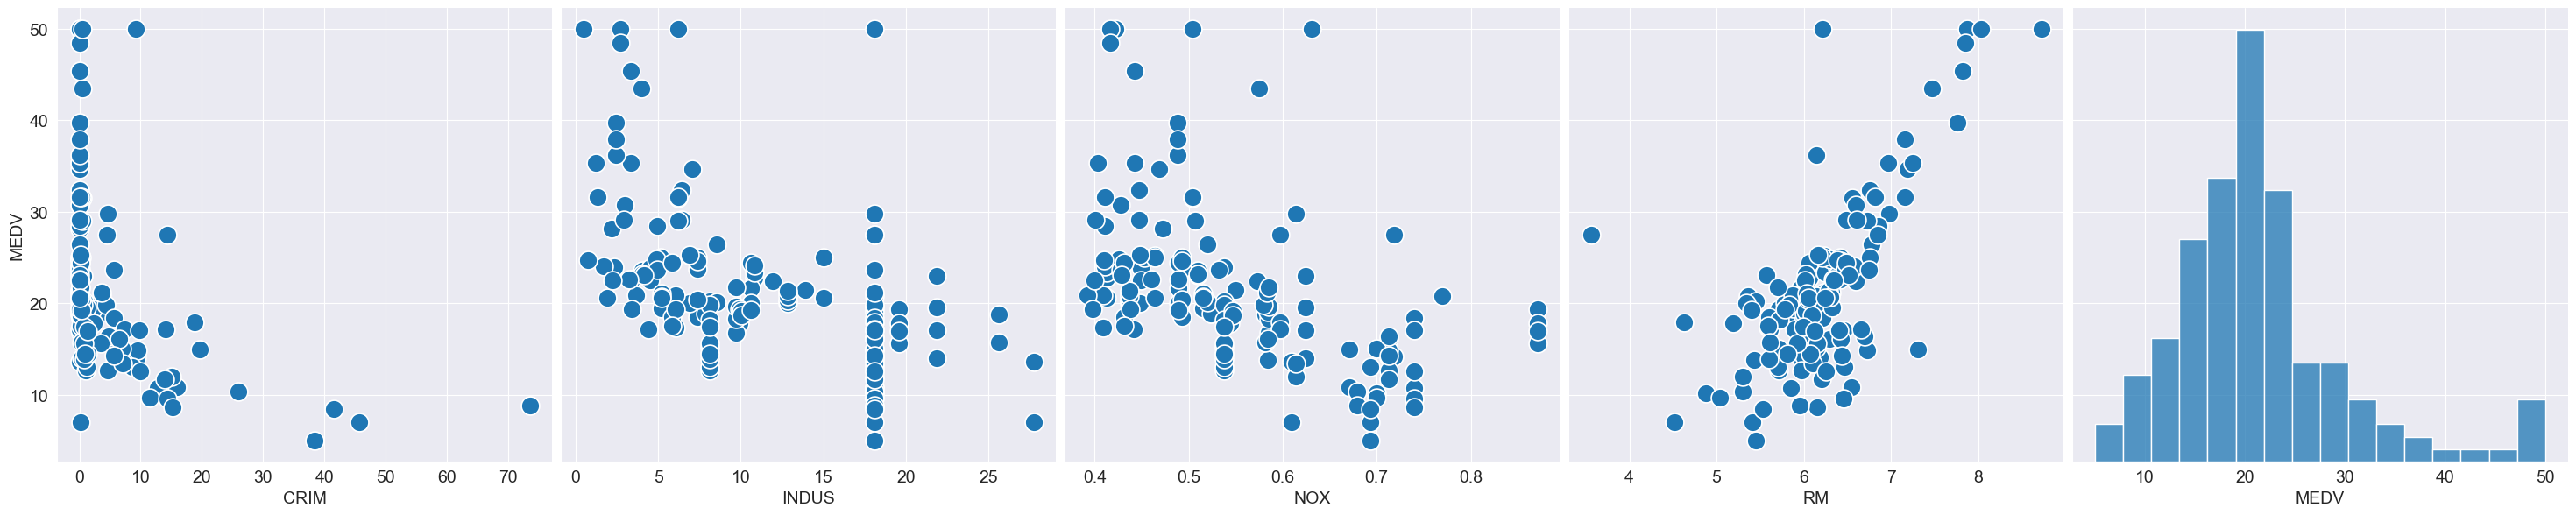

In [192]:
#Начинаю работать с тестовыми данными и проделываю то же самое, что и с тренировочными
new_df_test_data = df_test_data.drop(['ZN', 'CHAS', 'DIS', 'B'], axis=1)    # удалил слабокоррелирующие признаки из тестовой выборки
sns.pairplot(data=new_df_test_data[features6],  y_vars = ['MEDV'], diag_kind='auto', height=6)
plt.show()

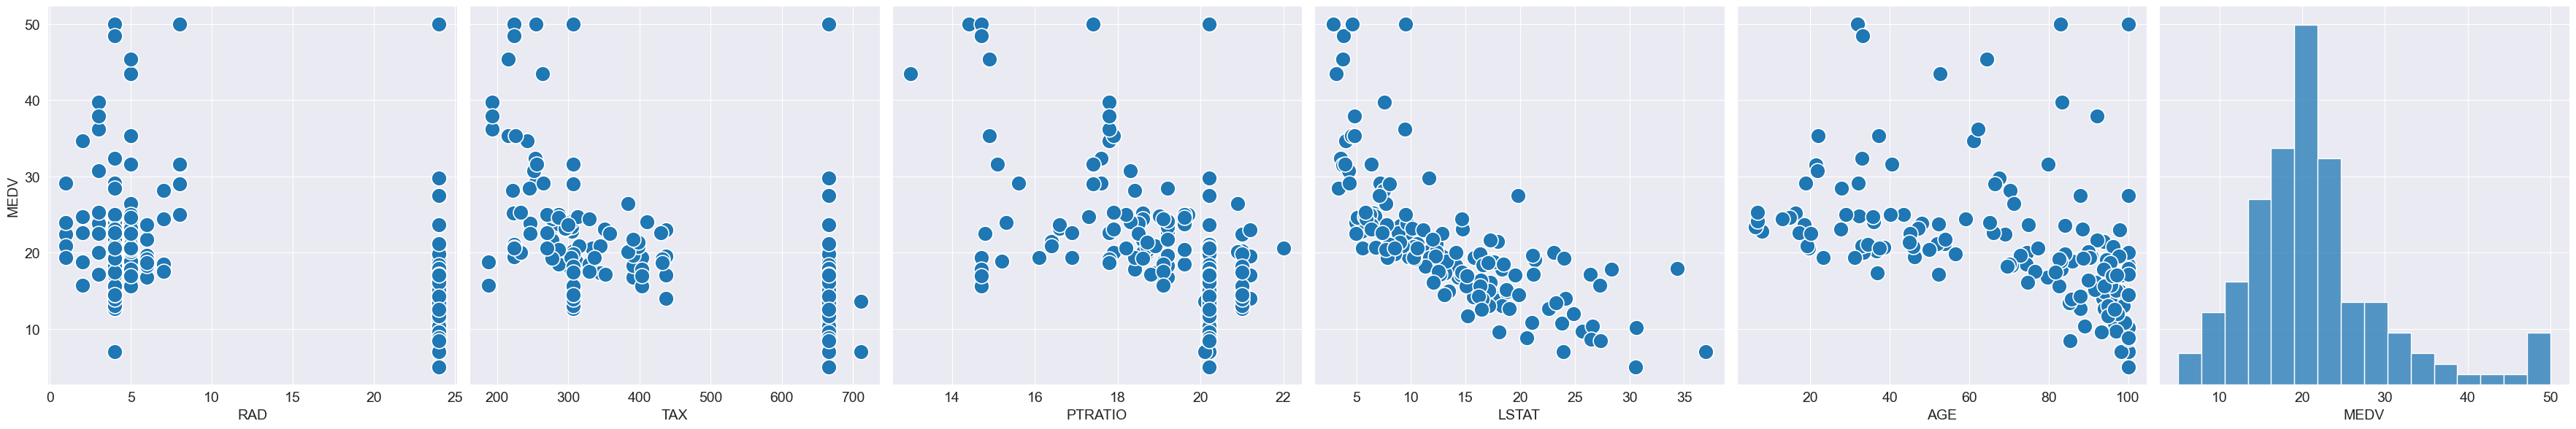

In [193]:
sns.pairplot(data=new_df_test_data[features7],  y_vars = ['MEDV'], diag_kind='auto', height=6)
plt.show()

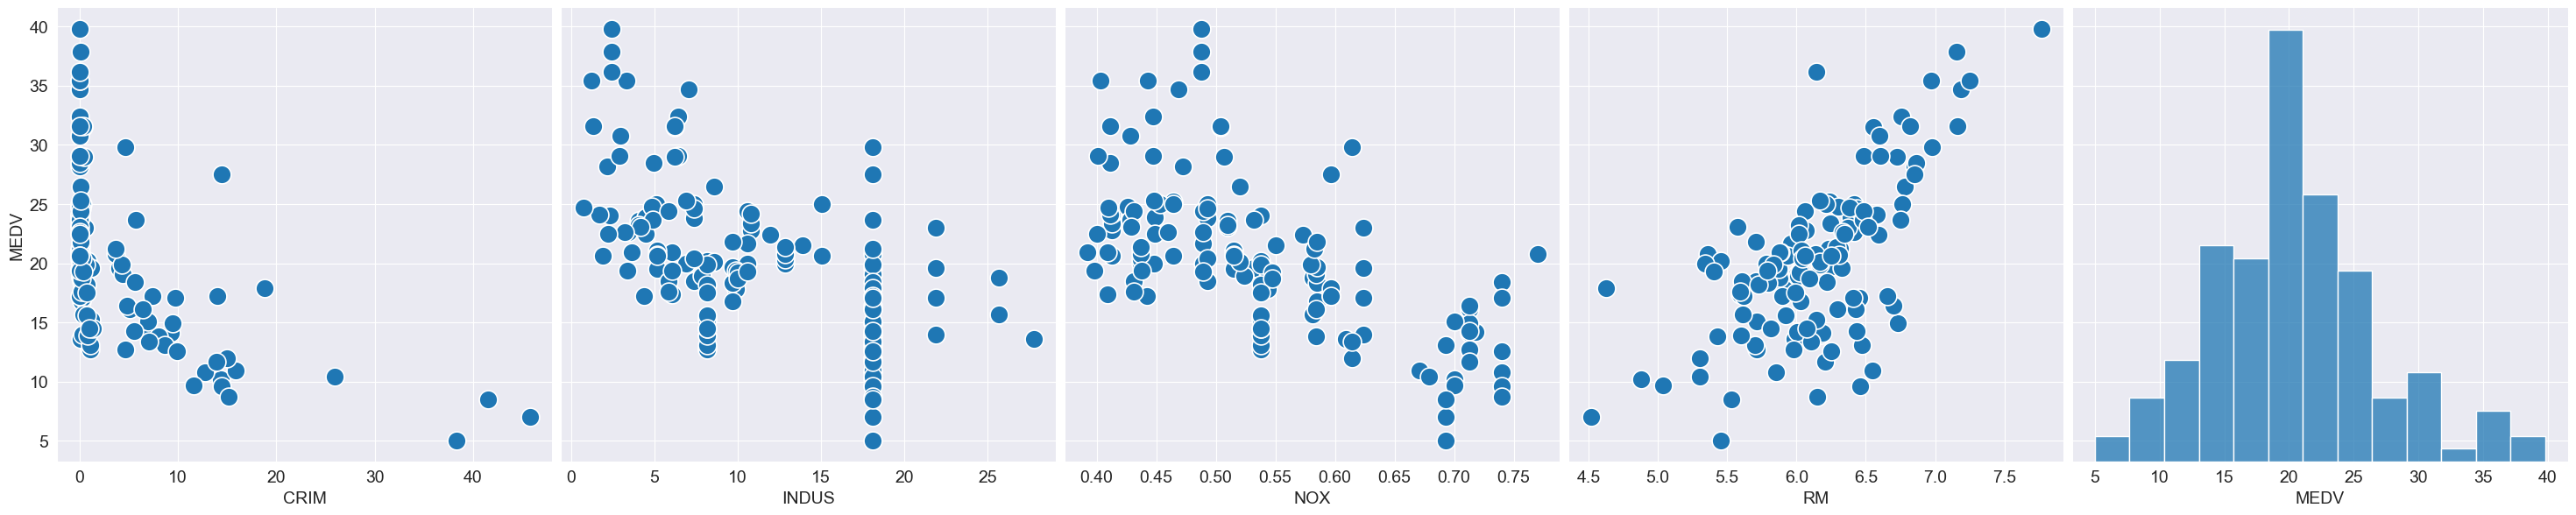

In [194]:
clean_new_df_test_data = clean_dataset(new_df_test_data) # чистка
sns.pairplot(data=clean_new_df_test_data[features6],  y_vars = ['MEDV'], diag_kind='auto', height=6) #проверка, что убрал нужные точки
plt.show()

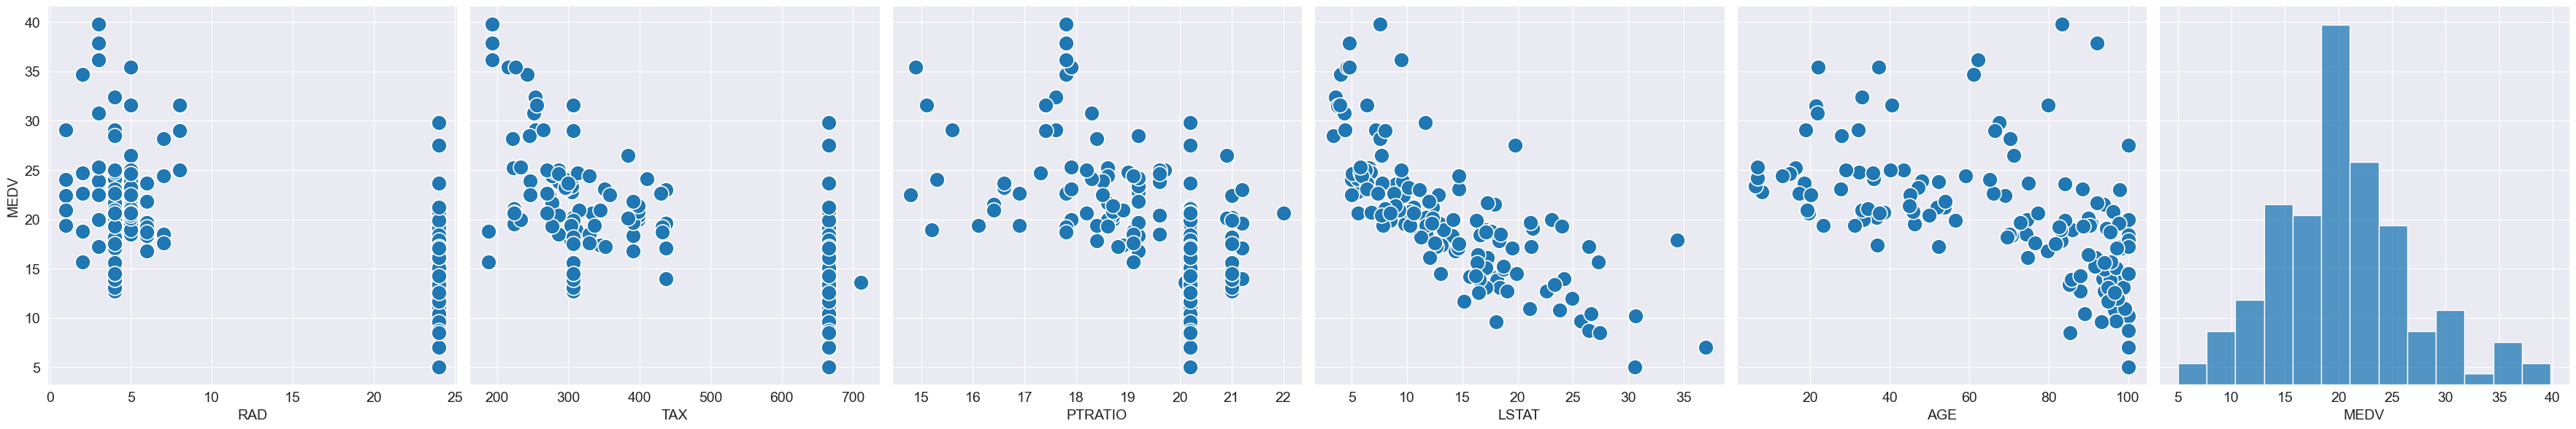

In [195]:
sns.pairplot(data=clean_new_df_test_data[features7],  y_vars = ['MEDV'], diag_kind='auto', height=6) #проверка, что убрал нужные точки
plt.show()

In [196]:
#Правка распределения тестовой выборки, признаки те же самые, что и для тренировочной

clean_new_df_test_data['CRIM_log'] = np.log(clean_new_df_test_data['CRIM'])
clean_new_df_test_data['INDUS_log'] = np.log(clean_new_df_test_data['INDUS'])
clean_new_df_test_data['NOX_log'] = np.log(clean_new_df_test_data['NOX'])
clean_new_df_test_data['RAD_log'] = np.log(clean_new_df_test_data['RAD'])
clean_new_df_test_data['TAX_log'] = np.log(clean_new_df_test_data['TAX'])
clean_new_df_test_data['PTRATIO_log'] = np.log(clean_new_df_test_data['PTRATIO'])
clean_new_df_test_data['LSTAT_log'] = np.log(clean_new_df_test_data['LSTAT'])
clean_new_df_test_data['AGE_log'] = np.log(clean_new_df_test_data['AGE'])

DEL_clean_new_df_test_data = clean_new_df_test_data.drop(['CRIM', 'INDUS', 'NOX', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'AGE'], axis=1)
DEL_clean_new_df_test_data.head(2)  # проверяю, что остались только нужные столбцы

#pt.fit(clean_new_df_test_data['CRIM'].values.reshape(-1,1))
#pt.transform(clean_new_df_test_data['CRIM'].values.reshape(-1,1))

#pt.fit(clean_new_df_test_data['INDUS'].values.reshape(-1,1))
#pt.transform(clean_new_df_test_data['INDUS'].values.reshape(-1,1))

#pt.fit(clean_new_df_test_data['NOX'].values.reshape(-1,1))
#pt.transform(clean_new_df_test_data['NOX'].values.reshape(-1,1))

#clean_new_df_test_data['RAD_log'] = np.log(clean_new_df_test_data['RAD'])

#pt.fit(clean_new_df_test_data['TAX'].values.reshape(-1,1))
#pt.transform(clean_new_df_test_data['TAX'].values.reshape(-1,1))

#pt.fit(clean_new_df_test_data['PTRATIO'].values.reshape(-1,1))
#pt.transform(clean_new_df_test_data['PTRATIO'].values.reshape(-1,1))

#pt.fit(clean_new_df_test_data['LSTAT'].values.reshape(-1,1))
#pt.transform(clean_new_df_test_data['LSTAT'].values.reshape(-1,1))

#pt.fit(clean_new_df_test_data['AGE'].values.reshape(-1,1))
#pt.transform(clean_new_df_test_data['AGE'].values.reshape(-1,1))


#DEL_clean_new_df_test_data = clean_new_df_test_data.drop(['RAD'], axis=1)
#DEL_clean_new_df_test_data.head(2)

C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\4184931512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_test_data['CRIM_log'] = np.log(clean_new_df_test_data['CRIM'])
C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\4184931512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_new_df_test_data['INDUS_log'] = np.log(clean_new_df_test_data['INDUS'])
C:\Users\Bychkov\AppData\Local\Temp\ipykernel_18712\4184931512.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

,RM,MEDV,CRIM_log,INDUS_log,NOX_log,RAD_log,TAX_log,PTRATIO_log,LSTAT_log,AGE_log
173,6.416,23.6,-2.388361,1.398717,-0.673345,1.609438,5.690359,2.809403,2.201659,4.432007
274,6.758,32.4,-2.874577,1.857859,-0.805197,1.386294,5.537334,2.867899,1.261298,3.493473


In [197]:
#def preprocess_data_poly(df, max_power):
    #kolonki = df.columns.values
    #Kolichestvo_Kolonok = kolonki.size
    
    #for name in range(Kolichestvo_Kolonok):
        #df[f'{kolonki[name]}_poly_{max_power}'] = df[kolonki[name]]**max_power   # создаю столбец и добавляю в него данные возведенные во 2 степень
    #return df

clean_reg_model = LinearRegression()                  #создаю объект

#Тренировка
clean_df_x = DEL_clean_new_df_train_data.copy()       #копирую
clean_y_true = clean_df_x.pop('MEDV')                 #записываю в переменную y без заголовка
clean_df_x = preprocess_data_poly(clean_df_x, slojnost_modeli)    #возвожу в степень


clean_reg_model.fit(clean_df_x, clean_y_true)         #обучаю
clean_y_pred = clean_reg_model.predict(clean_df_x)    #предсказываю


#Тестовая
clean_df_test_x = DEL_clean_new_df_test_data.copy()
clean_y_test_true = clean_df_test_x.pop('MEDV')
clean_df_test_x = preprocess_data_poly(clean_df_test_x, slojnost_modeli)

clean_y_test_pred = clean_reg_model.predict(clean_df_test_x)

In [198]:
print('Метрики с очисткой данных, но без предобработки')
vivod_metric(clean_y_true, clean_y_pred, clean_y_test_true, clean_y_test_pred) # функция вывода метрик

Метрики с очисткой данных, но без предобработки

MAE
Test vs train: 2.0071088760444336 | 2.110357850937299
Error ratio: 0.9510751340835356

R2
Test vs train: 0.8245224939108178 | 0.8439720187357533
Error ratio: 0.9769547752850024

RMSE
Test vs train: 2.6761038833994424 | 2.7822062775156744
Error ratio: 0.9618639369144928


In [199]:
#После очистки данных средняя абсолютная ошибка составила 4% от максимального значения цены, в тоже время отношение MAE тренировки к MAE теста имеет не высокое значние,
#то есть переобучения модели тоже не произошло
#R2 выше 0,8, что говорит о том, что модель получилась неплохая
#RMSE, судя по тому, что оно больше MAE в данных имеются выбросы и среднее значение ошибки между истинным значением и предсказаным больше 1
#После очистки данных и правки распределения MAE снизилось на 0,55, а RMSE на 1, что говорит о том, что количество выбросов снизилось

In [200]:
from sklearn.preprocessing import MinMaxScaler

#def preprocess_data_poly(df, max_power):
    #kolonki = df.columns.values
    #Kolichestvo_Kolonok = kolonki.size
    
    #for name in range(Kolichestvo_Kolonok):
        #df[f'{kolonki[name]}_poly_{max_power}'] = df[kolonki[name]]**max_power   # создаю столбец и добавляю в него данные возведенные во 2 степень
    #return df

# Создаю класс предобработки
class DataPreprocessing:
    def __init__(self):
        self.scaler = MinMaxScaler()                            # создаю объект класса, чтобы далее отмасштабировать свои данные от 0 до 1
        pass

    def fit(self, df):

        copy = df.copy()                                        #копирую 
        copy = preprocess_data_poly(copy, slojnost_modeli)      #(эта функция выше приведена) 
                                                        

        self.scaler.fit(copy)                                   # масштабирую и записываю в переменную
        

        pass

    def transform(self, df):
        dannie_copy = df.copy()                                 #копирую
        dannie_copy = preprocess_data_poly(dannie_copy, 2)      #(эта функция выше приведена)

    
        new_train = self.scaler.transform(dannie_copy)          # масштабирую и записываю в переменную
        
        d = pd.DataFrame(data=new_train, index = dannie_copy.index.values, columns = dannie_copy.columns.values)   # преобразую эту переменную в датафрейм
     
         # Возвращать transform() должен тоже DataFrame!
        return d

In [201]:
preproc = DataPreprocessing()
preproc.fit(DEL_clean_new_df_train_data)

_train_result = preproc.transform(DEL_clean_new_df_train_data)
_test_result = preproc.transform(DEL_clean_new_df_test_data)


new_train_result = _train_result.drop(['MEDV_poly_2'], axis=1)   #удаляю ненужную колонку, которая возникла при использовании класса, оставляю только колонку MEDV
new_test_result = _test_result.drop(['MEDV_poly_2'], axis=1)     #удаляю ненужную колонку, которая возникла при использовании класса, оставляю только колонку MEDV


In [202]:
preproc_clean_reg_model = LinearRegression()               #создаю объект

#Тренировка
preproc_clean_df_x = new_train_result.copy()               #копирую
preproc_clean_y_true = preproc_clean_df_x.pop('MEDV')      #записываю в переменную y без заголовка
#new_df_x = preprocess_data_poly(new_df_x, slojnost_modeli)    #НАСКОЛЬКО Я ПОНИМАЮ ВОЗВОДИТЬ В СТЕПЕНЬ УЖЕ НЕ НУЖНО, ТАК КАК ЭТО БЫЛО СДЕЛАНО РАНЕЕ В ПРЕДОБРОБОТКЕ


preproc_clean_reg_model.fit(preproc_clean_df_x, preproc_clean_y_true)         #обучаю
preproc_clean_y_pred = preproc_clean_reg_model.predict(preproc_clean_df_x)    #предсказываю


#Тестовая
preproc_clean_df_test_x = new_test_result.copy()                       #копирую
preproc_clean_y_test_true = preproc_clean_df_test_x.pop('MEDV')        #записываю в переменную y без заголовка
#new_df_test_x = preprocess_data_poly(new_df_test_x, slojnost_modeli)  #НАСКОЛЬКО Я ПОНИМАЮ ВОЗВОДИТЬ В СТЕПЕНЬ УЖЕ НЕ НУЖНО, ТАК КАК ЭТО БЫЛО СДЕЛАНО РАНЕЕ В ПРЕДОБРОБОТКЕ

preproc_clean_y_test_pred = preproc_clean_reg_model.predict(preproc_clean_df_test_x)  #предсказываю

In [203]:
print('Метрики с очисткой данных и с предобработкой')
vivod_metric(preproc_clean_y_true, preproc_clean_y_pred, preproc_clean_y_test_true, preproc_clean_y_test_pred)

Метрики с очисткой данных и с предобработкой

MAE
Test vs train: 0.051464330154985714 | 0.05411173976762302
Error ratio: 0.9510751340835405

R2
Test vs train: 0.8245224939108169 | 0.8439720187357534
Error ratio: 0.9769547752850013

RMSE
Test vs train: 0.06861804829229358 | 0.07133862250040186
Error ratio: 0.9618639369144959


In [204]:
weights = preproc_clean_reg_model.coef_
bias = preproc_clean_reg_model.intercept_

print(f'Model weights:\n{weights}\n')
print(f'Model bias:\n{bias}\n')
print(f'Weights min: {weights.min()}')
print(f'Weights max: {weights.max()}')

Model weights:
[-3.01522048 -0.2443859  -0.28155382 -0.31500298  0.1863397  -3.07937054
 -0.58044685 -0.08792415  0.43585917  3.26911541 -0.2014227   0.24295764
 -0.30231807 -0.09855004  3.03274226  0.41768606 -0.2957899  -0.43026333]

Model bias:
1.2871867206654763

Weights min: -3.0793705367856172
Weights max: 3.2691154103628537


In [205]:
#После очистки и предобработки данных средняя абсолютная ошибка составила 1% от максимального значения цены, в тоже время отношение MAE тренировки к MAE теста имеет 
# не высокое значение, то есть переобучения модели тоже не произошло
#R2 выше 0,8, что говорит о том, что модель получилась неплохая
#RMSE, судя по тому, что оно больше MAE в данных имеются некоторые выбросы и среднее значение ошибки между истинным значением и предсказаным немного больше 1
#После очистки и предобработки MAE снизилось на 2,5, а RMSE на 3,55 от своих первоначальных значений

#Веса также не имеют каких-то аномальных значений

В ходе работы заметил, что MAE и RMSE несколько выросли, а R2 снизилось на 0.02 после того, как я вместо команды np.log(data) использовал класс PowerTransform для нормализации распределения. Мне казалось, что должно быть наоборот за счет использования автоматизированного способа, возможно, я где-то ошибся, но найти эту ошибку не удалось. При использовании PowerTransform MAE составило 0.05536674498974197, R2 = 0.8041489705070689, RMSE = 0.07249208046703351. Результаты при использовании np.log(data) представлены выше. При этом визуально  PowerTransform нормализовал гораздо лучше, чем log(data).



Возможно, для улучшения модели имеет смысл генерировать полиномы только для признаков имеющих явно нелинейный характер. Я не уверен, что переобученность по какому либо отдельному признаку может повлиять на параметры модели в целом.

Исходя из оценки метрик после каждого этапа, можно сделать вывод, что использование MinMaxScaler наиболее всего улучшает параметры модели

Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты по вашим размышлениям и процессу улучшения модели.

Успехов вам, мы в вас верим и уверены, что вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>